# MSE 211 MDP Project

We can do the project here

In [18]:
from mdp import *
from solver import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

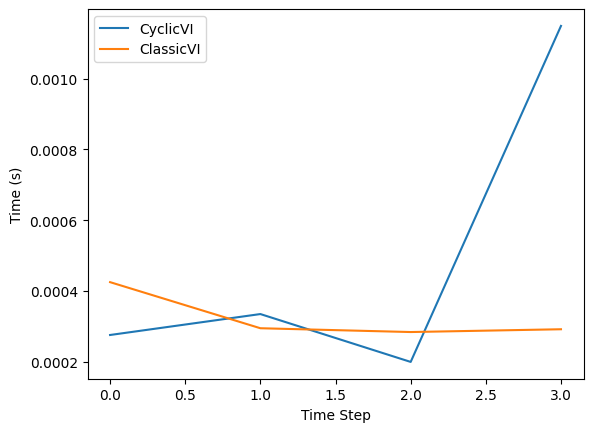

In [2]:
g = GridWorld(5)

iterators = [CyclicVI(), ClassicVI()]#[RandomVI(k=k) for k in range(1, 26, 5)]

for iterator in iterators:
    solver = Solver(iterator, g, 0.9)
    solver.solve(steps = 3)
    solver.plot_time()
    
plt.legend()
plt.show()


In [3]:
iterators = [CyclicVI(), ClassicVI(), RandomCyclicVI()] + [RandomVI(k=k) for k in [5,15,20]]

data = { iterator.name : {} for iterator in iterators }

for iterator in iterators:
    name = iterator.name
    solver = Solver(iterator, g, 0.9)
    measures = []
    deltas = []
    for _ in range(50):
        solver.solve(steps=3)
        measures.append(solver.time_each_step)
        deltas.append(solver.deltas)
        
    measures = np.array(measures)
    avg = measures.mean(axis=0)

    data[name]["avg_speed"] = avg
    data[name]["delta"] = deltas

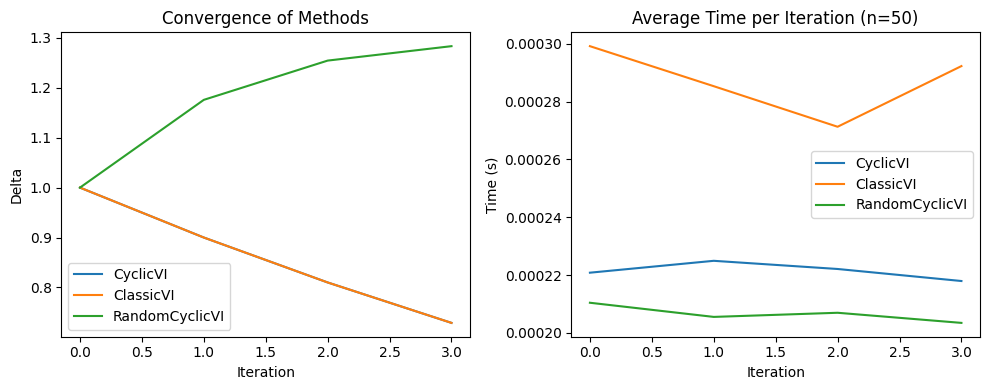

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

# Plot one iteration for convergence
ax = axs[0]
for name in data:
    if "k" not in name:
        ax.plot(np.array(data[name]["delta"]).mean(axis=0), label=name)
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Delta")
        ax.set_title("Convergence of Methods")

ax.legend()

# Plot deltas over time
ax = axs[1]
for name in data:
    if "k" not in name:
        ax.plot(data[name]["avg_speed"], label=name)
        ax.set_ylabel("Time (s)")
        ax.set_xlabel("Iteration")
        ax.set_title("Average Time per Iteration (n={})".format(50))

ax.legend()

plt.tight_layout()
#plt.savefig("figs/classic_vs_cyclic_vs_randomcyclic.png")

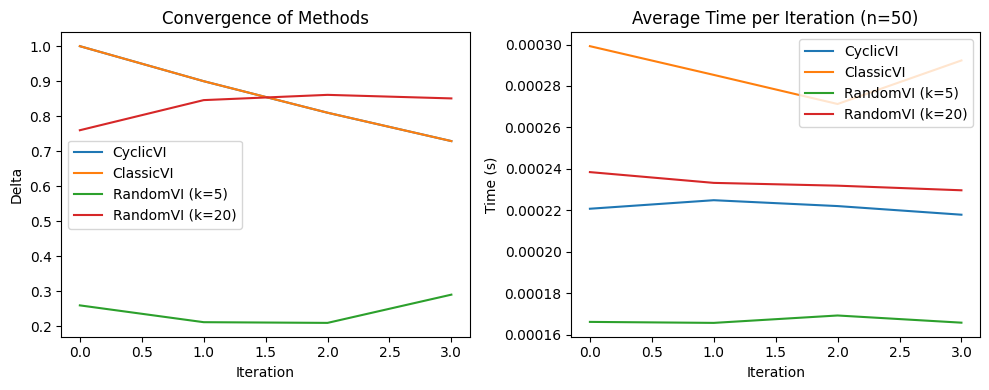

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

# Plot one iteration for convergence
ax = axs[0]
for name in data:
    if name in ["ClassicVI", "CyclicVI"] or ("RandomVI" in name and "k=15" not in name):
        ax.plot(np.array(data[name]["delta"]).mean(axis=0), label=name)
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Delta")
        ax.set_title("Convergence of Methods")

ax.legend()

# Plot deltas over time
ax = axs[1]
for name in data:

    # Classic, random k=5,15, Cyclic
    if name in ["ClassicVI", "CyclicVI"] or ("RandomVI" in name and "k=15" not in name):
        ax.plot(data[name]["avg_speed"], label=name)
        ax.set_ylabel("Time (s)")
        ax.set_xlabel("Iteration")
        ax.set_title("Average Time per Iteration (n={})".format(50))

# ax.legend()
# ax.legend(bbox_to_anchor=(0.5, 0.5), bbox_transform=fig.transFigure)
ax.legend(loc="upper right")


plt.tight_layout()
#plt.savefig("figs/classic_v_cyclic_v_random.png")

In [27]:
# Look only at the starting states, which are the ones where there is only
# one X
model = TicTacToe()
N = len(model.states)

iterators = [RandomVI(k=int(k)) for k in [N * 0.1, N * 0.5, N * 0.75]] + [ClassicVI(), CyclicVI(), RandomCyclicVI()] 

solvers = {iterator.name: [] for iterator in iterators}

for iterator in iterators:
    name = iterator.name
    num = 1 if name in ["CyclicVI", "ClassicVI"] else 10
    for i in range(num):
        solver = Solver(iterator, model, 0.9)
        solver.solve(steps=1)
        
        solvers[name].append(solver)



In [7]:
def display_start_state_board(ax, solver):

    name = solver.iterator.name
    solution = solver.solution
    solution_keys = list(solution.keys())
    
    def start_state(board):
        x_count = board.count("X")
        o_count = board.count("O")
        return x_count == 1 and o_count == 0
    
    # Get states for initial boards
    initial_boards = list(filter(start_state, solution_keys))

    print(initial_boards)
    
    initial_board_data = np.array([solution[board] for board in initial_boards]).reshape(3,3)
    
    cbarlabel="State Value"
    im = ax.imshow(initial_board_data, cmap="summer")
    
    for i in range(3):
        for j in range(3):
            text = ax.text(j, i, "{:.3f}".format(initial_board_data[i, j]),
                           ha="center", va="center", color="black")
    
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_title(name)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

['X--------', '-X-------', '--X------', '---X-----', '----X----', '-----X---', '------X--', '-------X-', '--------X']
['X--------', '-X-------', '--X------', '---X-----', '----X----', '-----X---', '------X--', '-------X-', '--------X']
['X--------', '-X-------', '--X------', '---X-----', '----X----', '-----X---', '------X--', '-------X-', '--------X']
['X--------', '-X-------', '--X------', '---X-----', '----X----', '-----X---', '------X--', '-------X-', '--------X']
['X--------', '-X-------', '--X------', '---X-----', '----X----', '-----X---', '------X--', '-------X-', '--------X']
['X--------', '-X-------', '--X------', '---X-----', '----X----', '-----X---', '------X--', '-------X-', '--------X']


'\nStart w/ empty state\nLook at all states with one X, pick one of states with highest value\nOpponent places an O randomly\n\nGet all the states that match X and O in respective positions, with another X (lookahead)\nPick that state with the highest value from that selection\n\nRepeat this process until the game end\n\n'

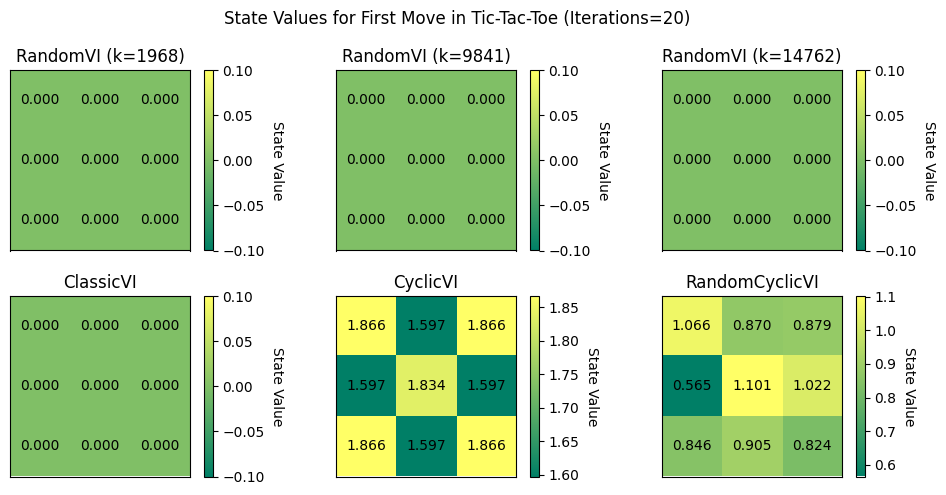

In [8]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
for i, solver in enumerate(solvers):
    ax = axs.flatten()[i]
    display_start_state_board(ax, solver)

fig.suptitle("State Values for First Move in Tic-Tac-Toe (Iterations=20)")
plt.tight_layout()
# plt.savefig("figs/tictactoe.png")
"""
Start w/ empty state
Look at all states with one X, pick one of states with highest value
Opponent places an O randomly

Get all the states that match X and O in respective positions, with another X (lookahead)
Pick that state with the highest value from that selection

Repeat this process until the game end

"""

In [9]:
policy = solvers[4].policy

In [28]:
data = {}
for name in solvers:
    
    data[name] = {
        "policy": [solver.policy for solver in solvers[name]]
    }

In [14]:
for name in data:
    policy = data[name]["policy"]
    blank_board = '-' * 9
    plt.hist(policy[blank_board])


KeyboardInterrupt



In [100]:
def format_one_element(board, element="X"):
    pos = board.find(element)
    if pos == -1:
        return "EMPTY"
    names = ["Top Left", "Top Mid", "Top Right", 
             "Mid Left", "Mid Mid", "Mid Right", 
             "Bott Left", "Bott Mid", "Bott Right"]
    return names[pos]

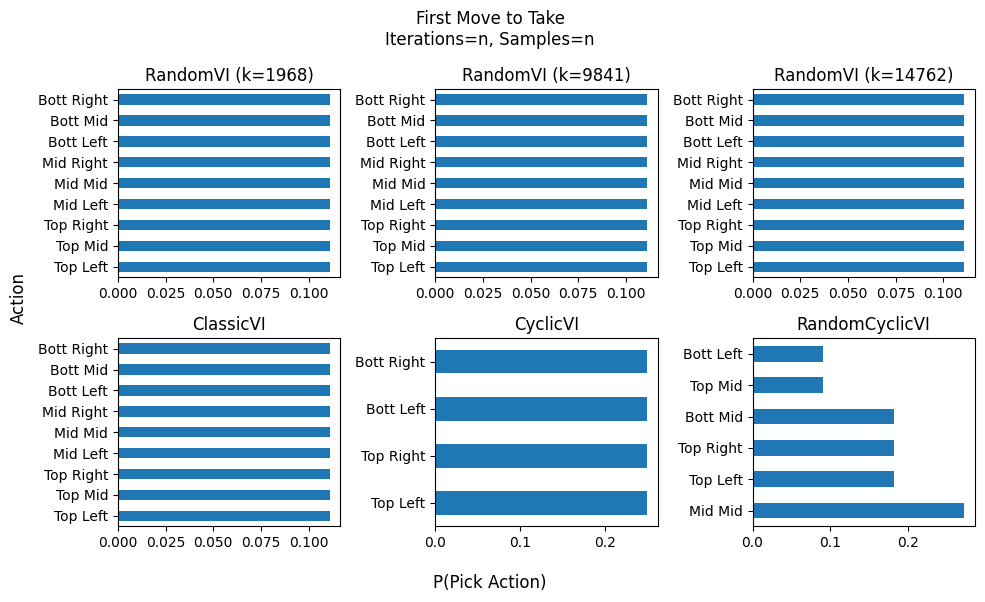

In [104]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
for i, name in enumerate(data):
    ax = axs.flatten()[i]
    policy = data[name]["policy"]
    blank_board = '-' * 9
    blank_policies = []
    for policy in data[name]["policy"]:
        if blank_board in policy:
            blank_policies.append(policy[blank_board])
            
    if len(blank_policies) > 0:
        actions = np.hstack(blank_policies)
        actions = map(format_one_element, actions)
        counts = pd.Series(actions).value_counts()
        counts = counts / counts.sum()
        counts.plot(kind="barh", ax=ax)

    else:
        ax.text(0.5, 0.5, 'State Unseen', ha='center',   va='center')

    ax.set_title(name)
    
fig.suptitle("First Move to Take\nIterations=n, Samples=n")
fig.supxlabel("P(Pick Action)")
fig.supylabel("Action")
plt.tight_layout()

<Axes: >

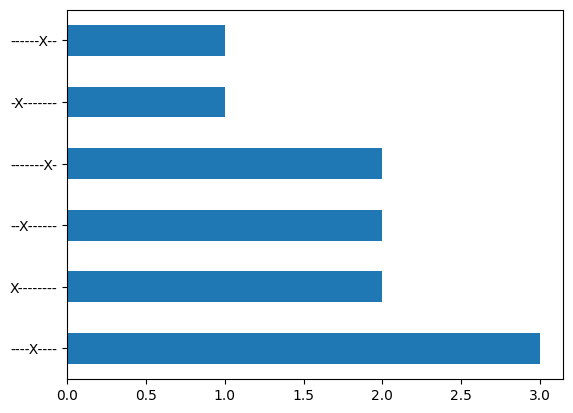

In [46]:
pd.Series(np.hstack([p ["-" * 9] for p in data["RandomCyclicVI"]["policy"]])).value_counts().plot(kind="barh")

In [45]:
pd.np.hstack([p ["-" * 9] for p in data["RandomCyclicVI"]["policy"]])

array(['X--------', '--X------', '-------X-', '-------X-', '----X----',
       '--X------', '----X----', '----X----', 'X--------', '-X-------',
       '------X--'], dtype='<U9')

In [55]:
data["RandomCyclicVI"]["policy"]

[{'OOOXOX-X-': ['OOOXOX-X-'],
  '-XO-OXO-O': ['-XO-OXO-O'],
  'XOOO-XOOO': ['XOOO-XOOO'],
  'X-X-XXOXX': ['X-X-XXOXX'],
  'O--OXOX-X': ['O-XOXOX-X', 'O--OXOXXX'],
  'XXX-OOXOX': ['XXX-OOXOX'],
  'OOX-X---X': ['OOX-X--OX'],
  '-X--O-O-O': ['XX--O-O-O'],
  'X-OOX--XO': ['XXOOX--XO'],
  'XOXOXOO-O': ['XOXOXOOXO'],
  'OX-O-OX-O': ['OXXO-OX-O', 'OX-OXOX-O'],
  '-OXXOOOO-': ['-OXXOOOO-'],
  'XOO--O--O': ['XOO--O--O'],
  'O--XX-OOX': ['O--XXXOOX'],
  'OXXOOOXXX': ['OXXOOOXXX'],
  'X-OX-XO-X': ['XOOX-XO-X', 'X-OX-XOOX'],
  '-XO-O-X--': ['-XO-O-XX-'],
  '--XXOXXXX': ['--XXOXXXX'],
  'X-XX---XX': ['XOXX---XX', 'X-XXO--XX', 'X-XX-O-XX', 'X-XX--OXX'],
  '-XO--XOXO': ['-XO-XXOXO'],
  '--XOXXXOX': ['--XOXXXOX'],
  'OXXO----O': ['OXXOX---O'],
  'X-X-O-XOO': ['XXX-O-XOO', 'X-XXO-XOO'],
  'OXO-OOOXX': ['OXO-OOOXX'],
  'OOOXOOX--': ['OOOXOOX--'],
  '-XXOO-XXO': ['OXXOO-XXO', '-XXOOOXXO'],
  'OXXOXO--O': ['OXXOXOX-O', 'OXXOXO-XO'],
  'OXX--XOX-': ['OXXO-XOX-', 'OXX-OXOX-', 'OXX--XOXO'],
  'OX---O-XO': ['